# Анализ интернет-магазина «Стримчик»

**Описание проекта**

Мы проводим анализ для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель проекта:**

1. Провести исследовательский анализ данных:
 - Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - Как менялись продажи по платформам. Найти платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 - Взять данные за соответствующий актуальный период. Актуальный период определяется в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
 - Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
 - Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
 - Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы.
 - Соотнести выводы с продажами игр на других платформах.
 - Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

2. Составить портрет пользователя каждого региона.

   Определить для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Описать различия в долях продаж.
 - Самые популярные жанры (топ-5). Пояснить разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

3. Проверить гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Описание данных:**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**План работы:**

[1. Загрузка данных](#section_1)

[2. Предобработка данных](#section_2)

[3. Исследовательский анализ данных](#section_3)

[4. Портреты пользователей каждого региона](#section_4)

[5. Проверка гипотез](#section_5)

[6. Общий вывод](#section_6)


## Загрузка данных
<a id='section_1'></a>

In [1]:
#Загрузка библиотек
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
#Загрузка датафрейма
games = pd.read_csv('/datasets/games.csv')

In [3]:
#Общая информация исходного датафрейми
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Первые 10 строк исходного датафрейма
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Вывод:**

Загрузили датафрейм **games**, в нем 11 столбцов, 16715 записей.

Типы данных:
1. Категориальные: Name, Platform, Genre, Rating.
2. Колличественные: Year_of_Release, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score.

Есть пропуски в столбцах:
- Name
- Year_of_Release
- Genre
- Critic_Score
- User_Score 
- Rating

Все столбцы нужно привести к *snake_case* (Убрать заглавные буквы в начале названий).

Изменения типа данных требуют столбцы:
- Year_of_Release на *int* (год издания - целое число )
- Critic_Score на *int* (Оценки критиков в датафрейме - целые числа)
- User_Score на *float* (Оценки пользователей в датафреме - вещественные числа)


## Предобработка данных
<a id='section_2'></a>

### Изменение названий столбцов

In [5]:
#Приведение к названий столбцов к snake_case
games.columns = games.columns.str.lower()

### Просмотр аномалий

In [6]:
#Кол-во пропусков
print('Кол-во пропусков в столбцах:')
games.isna().sum()

Кол-во пропусков в столбцах:


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
#Разрез с пустыми значениями в name
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
#Распределение по названиям
games['name'].value_counts()

Need for Speed: Most Wanted                      12
LEGO Marvel Super Heroes                          9
Madden NFL 07                                     9
Ratatouille                                       9
FIFA 14                                           9
                                                 ..
The House of the Dead 2 & 3 Return                1
Suzunone Seven: Rebirth Knot                      1
Pokemon Conquest                                  1
Zyuden Sentai Kyoryuger: Game de Gaburincho!!     1
SoulLink Extension                                1
Name: name, Length: 11559, dtype: int64

In [9]:
#Разрез со значением "Need for Speed: Most Wanted" в поле name
games[games['name']=='Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [10]:
#Разрез с пустыми значениями в genre
games[games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
#Распределение по игр по жанрам
games['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [12]:
#Разрез с пустыми значениями в year_of_release
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
#Распределение по годам
games['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [14]:
#Разрез с пустыми значениями в critic_score
games[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
#Разрез с пустыми значениями в user_score
games[games['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [16]:
#Разрез с пустыми значениями в rating
games[games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [17]:
#Распределение рейтингов
games['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [18]:
#Разрез исходного датафрейма со значениями tbd в user_score
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


### Обработка пропусков:

1. В столбце **name** и **genre** по 2 пропуска в одних и тех же строках, данные восстановать не возможно, поэтому от этих строк избавляемся.
2. В столбцах **critic_score** и **user_score** невозможно восставновить данные, потому что для каждой игры оценка будет индивидуальной. В этих столбцах нельзя выявить среднее или медианное значени, оставим без изменений.
3. Значения в столбце **rating** заменим специальной заглушкой, потому что вариантов заменить пустые значения синтетикой не наблюдается, да и кол-во пропусков слишком большое.
4. Год выпуска иногда попадается в названии игры, таким образом часть пропусков в **year_of_release** можно заполнить за счет столбца **name**, от всех оставшихся пропусков мы избавимся, потому что без года издания строка не будет предствалять для нас никакого смылся при исследовании.
5. "tdb" в столбце **user_score** ознчает, что оценка отсутствует, поэтому можно заменить значения на "nan".

#### Обработка "name" и "genre"

In [19]:
#Удаление двух строк с аномалиями в name и genre
games = games.dropna(subset=['name']).reset_index(drop=True)

#### Обработка "rating"

Заполним пустые значения в rating заглушкой PL (plug, переводится "заглушка").

In [20]:
#Заполнение пропусков заглушкой
games['rating'] = games['rating'].fillna('PL')

In [21]:
#Распределение рейтингов
games['rating'].value_counts()

PL      6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

#### Обработка "year_of_release"

In [22]:
#Первые 30 строк с аномалией в year_of_release
games[games['year_of_release'].isna()].head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,PL
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,PL
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Год издания в поле **name** указан только в жанрах: **Sports**, **Fighting** и **Racing**.

In [23]:
#Создание таблици с пропусками в year_of_release
year_fix = (games.loc[
    games['year_of_release'].isna() & 
    ((games['genre'] == 'Sports') | (games['genre'] == 'Fighting') | (games['genre'] == 'Racing'))]
            [['name', 'year_of_release', 'genre']])
year_fix

,name,year_of_release,genre
183,Madden NFL 2004,NaN,Sports
377,FIFA Soccer 2004,NaN,Sports
475,wwe Smackdown vs. Raw 2006,NaN,Fighting
1300,Triple Play 99,NaN,Sports
1649,NASCAR Thunder 2003,NaN,Racing
...,...,...,...
16077,Football Manager 2007,NaN,Sports
16078,Ferrari: The Race Experience,NaN,Racing
16178,WRC: FIA World Rally Championship,NaN,Racing
16371,PDC World Championship Darts 2008,NaN,Sports


In [24]:
#Уникальные значения поля name в year_fix
year_fix['name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'wwe Smackdown vs. Raw 2006', 'Triple Play 99',
       'NASCAR Thunder 2003', 'Madden NFL 07', 'MLB SlugFest 20-03',
       'Shaun White Snowboarding', 'PES 2009: Pro Evolution Soccer',
       'Madden NFL 11', 'Test Drive Unlimited 2', 'Madden NFL 06',
       'NASCAR: Dirt to Daytona', 'Madden NFL 2002',
       'Def Jam: Fight for NY', 'NBA Street Vol. 2', 'Fishing Derby',
       'Karate', 'Tiger Woods PGA Tour 07', 'NHL Slapshot',
       'NFL GameDay 2003', 'NBA Live 2003', 'Dragster',
       'All-Star Baseball 2005',
       'The Dukes of Hazzard II: Daisy Dukes It Out', 'Indy 500',
       'College Hoops 2K6', 'Jonah Lomu Rugby Challenge', 'Jet X20',
       "Tony Hawk's Downhill Jam", 'Big Beach Sports 2',
       'Yu Yu Hakusho: Dark Tournament', 'Move Fitness',
       'WRC: FIA World Rally Championship', 'Famista 64', 'Backbreaker',
       'NBA Starting Five', 'Sword of the Samurai', 'Home Run',
       'Transworld Surf', 'Street Fi

In [25]:
#Функция для заполнения пропусков в году издания
def fill_year(row):
    year = 0
    last_word = ''
    genre = row[3]
    for word in row[0].split():
        try:
            last_word = word
            year = int(word)
        except:
            continue
    if genre in ('Sports', 'Racing', 'Fighting'):
        if year > 2000 or last_word in ('2K6','2K8'):
            if genre == 'Sports':
                year -=1
            if last_word == '2K6':
                year = 2005
            elif last_word == '2K8':
                year = 2007
            if year < 2017 and np.isnan(row[2]):
                row[2] = year
    return row

In [26]:
#Обработка части пропусков в year_of_release
games = games.apply(fill_year, axis=1)

Игры с неизвестным годом издания нам не принесут никакой пользы в данном исследовании, поэтому избавимся от них.

In [27]:
#Удаление строк без year_of_release
games = games.dropna(subset = ['year_of_release']).reset_index(drop=True)

In [28]:
#Общая информаци после удаления
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16462 entries, 0 to 16461
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16462 non-null  object 
 1   platform         16462 non-null  object 
 2   year_of_release  16462 non-null  float64
 3   genre            16462 non-null  object 
 4   na_sales         16462 non-null  float64
 5   eu_sales         16462 non-null  float64
 6   jp_sales         16462 non-null  float64
 7   other_sales      16462 non-null  float64
 8   critic_score     7997 non-null   float64
 9   user_score       9853 non-null   object 
 10  rating           16462 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Обработка "tbd"

In [29]:
#Замена значения tbd на nan
games['user_score'].replace('tbd', np.nan, inplace=True)

In [30]:
#Проверка замены
games[games['user_score'] == 'tbd']['name'].count()

0

### Обработка дубликатов

In [31]:
#Поиск дубликатов по названию, году и платформе
games_part = games[['name', 'year_of_release', 'platform']]
games[games_part.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15986,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [32]:
#Просмотр дубликатов
games[(games['name'] == 'Madden NFL 13') & (games['platform'] == 'PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
603,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15986,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [33]:
#Сложение продаж 2ух дубликатов
games.loc[603, 'eu_sales'] = games.loc[603, 'eu_sales'] + games.loc[15986, 'eu_sales']
games.loc[603]

name               Madden NFL 13
platform                     PS3
year_of_release           2012.0
genre                     Sports
na_sales                    2.11
eu_sales                    0.23
jp_sales                     0.0
other_sales                 0.23
critic_score                83.0
user_score                   5.5
rating                         E
Name: 603, dtype: object

In [34]:
#Удаление одного дубликата
games.drop(games[games_part.duplicated()].index, inplace=True)

In [35]:
#Общая информация после обработки дубликатов
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16461
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  float64
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     7996 non-null   float64
 9   user_score       7472 non-null   object 
 10  rating           16461 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Добавление столбца с суммарными продажами по миру

In [36]:
#Создание столбца с суммарными продажами по миру
games['world_sales'] = games.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,PL,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,PL,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16457,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,PL,0.01
16458,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,PL,0.01
16459,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,PL,0.01
16460,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,PL,0.01


### Приведение типов данных

In [37]:
#Кол-во пропусков
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8465
user_score         8989
rating                0
world_sales           0
dtype: int64

In [38]:
#Изменение типов данных
games['year_of_release'] = games['year_of_release'].astype('int')
games['critic_score'] = games['critic_score'].astype('Int64')
games['user_score'] = games['user_score'].astype('float64')

In [39]:
#Общая информация после предобработки
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16461
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  int64  
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     7996 non-null   Int64  
 9   user_score       7472 non-null   float64
 10  rating           16461 non-null  object 
 11  world_sales      16461 non-null  float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 1.6+ MB


**Вывод:**

**1. Обработка пропусков**

1. Удалили 2 строки с пропусками в name и genre одновременно.
2. Заполнили все пропуски в rating заглушкой со значением PL.
3. Были заполены некоторые пропуски в year_of_release на основе стобца name, остальные пропуски удалены.
4. Значение "tbd" в user_score заменили на nan (пустое значение) т.к. , "to be defined" ("tbd") означает, что значения пока что нет.

**2. Обработка дубликатов**

1. Был найден 1 дубликат, учтен в датафрейме и потом удален.

**3. Изменения типов данных**

1. Тип year_of_release изменен на *int*.
2. Тип critic_score изменен на *int*.
3. Тип user_score изменен на *float*.

**4. Добавление нового столбца**

1. Был добавлен столбец world_sales с суммарными продажами по миру.

**5. Причины возникновения пропусков**

1. Пропуски в name и genre связаны с тем, что издатель или какое-то другое ответсвенное лицо не указали эти данные, либо даже эта информация просто где-то потерялась. Также все эти пропуски относятся к одной и той же игре выпущенной в 1993 году, тогда особо не было баз данных с компьютерными играми, не удивительно, что у этой игры так много пропусков

2. Пропуски в year_of_release скорее всего связаны с тем, что издатель или какое-то другое ответсвенное лицо не указали эти данные, также имеют место ошибки и просто потерянные данные.

3. Пропуски в rating связаны с тем, что чтобы присвоить игре rating игру должна рассмотреть целая организация ESRB, это занимает время, а также далеко не все игры вообще получают этот rating за все время своего сущестования, как правило это только самые дорогие в разработке и популярные игры, плюс компания разработчик находится США либо Европе, где и базируется компания ESRB. 

4. Пропуски в user_score и critic_score связаны примерно с теми же причинами, что и rating, чтобы получить оценки от пользователй и критиков игра должна быть достаточно для этого известной, а этим качеством обладают далеко не все игры, также должно пройти достаточно времени для формирования оценок.

## Исследовательский анализ данных
<a id='section_3'></a>

На этапе исследовательского анализа требуется ответить на следующие вопросы:

1. Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2. Как менялись продажи по платформам. Найти платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
3. Взять данные за соответствующий актуальный период. Актуальный период определяется в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
4. Не учитываем в работе данные за предыдущие годы
5. Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
6. Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
7. Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы.
8. Соотнести выводы с продажами игр на других платформах.
9. Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [42]:
#Распределение игр оп годам
year_pivot = pd.pivot_table(games, index='year_of_release', values='name', aggfunc='count')
year_pivot.columns=['Кол-во игр']
year_pivot

,Кол-во игр
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


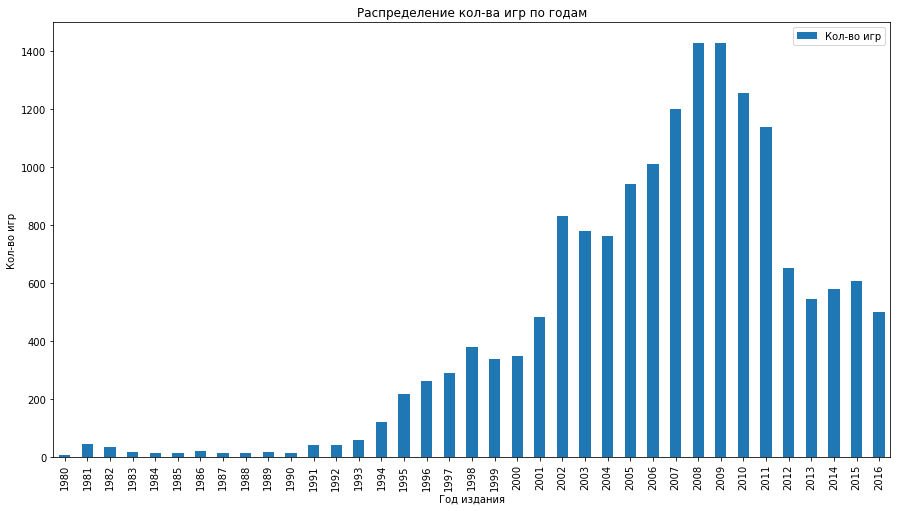

In [43]:
#Построение гистограммы распредления игр по годам
year_pivot.plot(kind='bar', figsize=(15, 8), title='Распределение кол-ва игр по годам',
                xlabel='Год издания', ylabel='Кол-во игр')

plt.show()

Данные за весь период не важны, т.к. с 1980 до 1993 выпускалось очень мало игр и в целом эта индустрия только зараждалась. После 1993 года кол-во выпущенных игр стабильно росло и к 2002 году эта индустрия набрала полный ход, в связи с развитием технологий и появлением новых, своременных игровых движков. К 2008 и 2009 годам индустрия дошла до своего пика и после пошла на спад связанный с финансовым кризисом и общим удорожанием производства.

### Как менялись продажи по платформам. Найти платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [44]:
#Создание сводной таблицы по платформам
platform_pivot = (pd.pivot_table(games, index='platform', values='world_sales', aggfunc='sum')
                  .sort_values('world_sales', ascending=False))
platform_pivot

,world_sales
platform,
PS2,1247.53
X360,961.30
PS3,931.34
Wii,891.18
DS,802.79
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.69


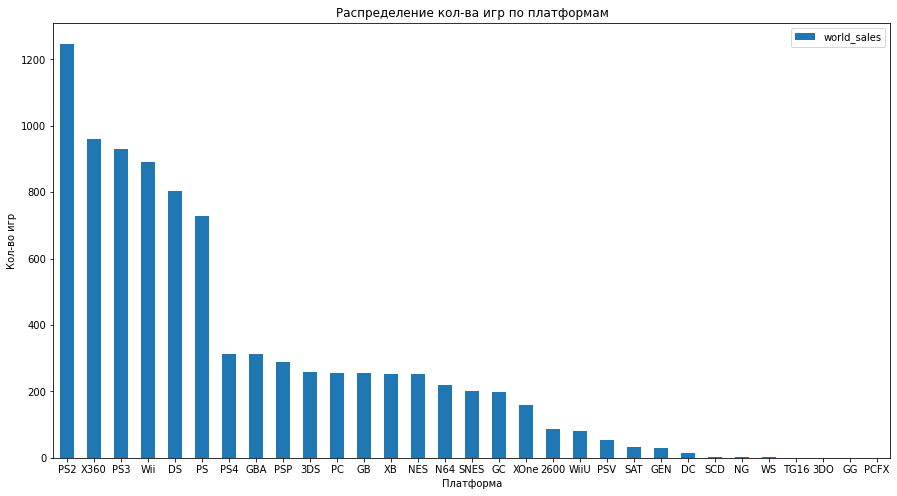

In [45]:
#Гистограмма распределения кол-ва игр по платформам
platform_pivot.plot(kind='bar', figsize=(15, 8), title='Распределение кол-ва игр по платформам',
                xlabel='Платформа', ylabel='Кол-во игр', rot=0)
plt.show()

Возьмем первые 7 платформ, чтобы в исследовании для наглядности была вся линейка приставок "Play Station".

In [46]:
#Первые 7 платформ по популярнсти 
best_platforms = list(platform_pivot.index[:7])

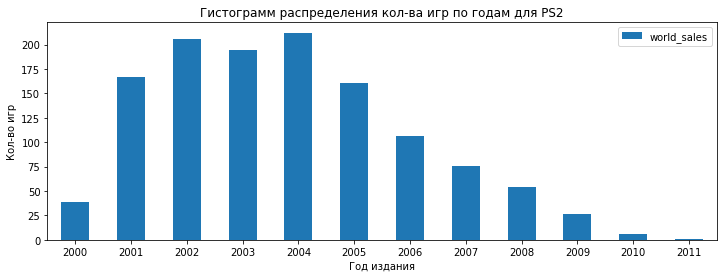

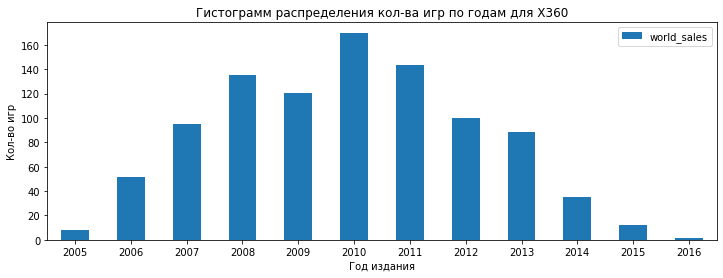

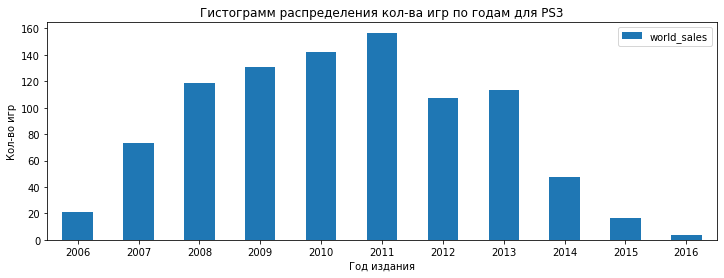

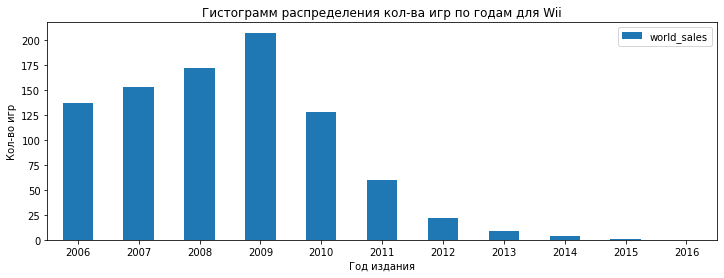

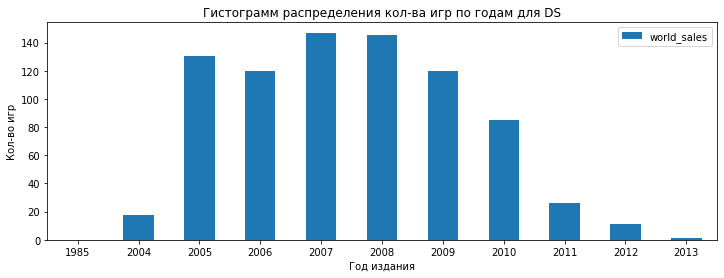

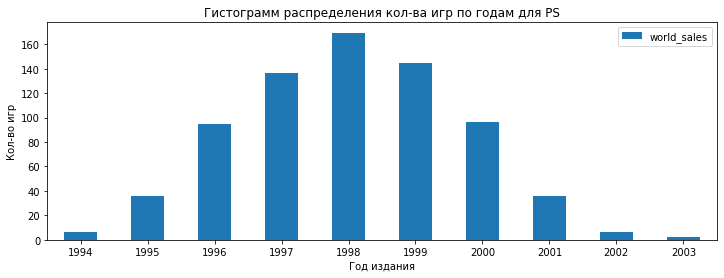

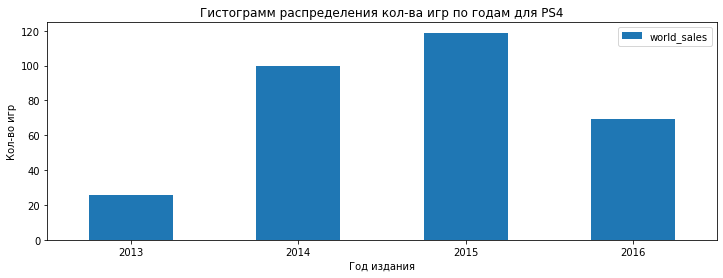

In [47]:
#Гистограммы распределения для популярных платформ
for platform in best_platforms:
    plat_pivot = pd.pivot_table(games[games['platform'] == platform], index='year_of_release',
                                values='world_sales', aggfunc='sum')
    plat_pivot_bar = plat_pivot.plot(kind='bar', figsize=(12, 4),
                    title=f'Гистограмм распределения кол-ва игр по годам для {platform}',
                    xlabel='Год издания', ylabel='Кол-во игр', rot=0)
    plt.show()

In [48]:
#Аномалия
games[(games['platform'] == 'DS') & (games['year_of_release'] ==1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
15720,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,NaN,PL,0.02


Платформа DS появилаясь только в 2004 году, оан физически не могла быть в 1985.

In [49]:
#Удаление аномалии
games = games.drop(15720).reset_index(drop=True)

In [50]:
# Комментарий ревьюера
temp = games.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

Для популярных платформ медианный срок жизни составляет 7 лет, пик продаж обычно происходит примерно на 4ый год. Избавились о  одной аномальной строчки.

### Взять данные за соответствующий актуальный период. Актуальный период определяется в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Возьмем актуальный период с 2013 года, потому что он соответсвует первому году продаж игр на PS4, логично предположить, что продажи на данную платформу будут только расти, плюс пик продаж обычно как раз приходится примерно на 5ый год т.е. 2017 год. Спад в 2016 году у PS4 скорее связан с общей ситуацией на рынке, есть общая тенденция снижения кол-ва продаж т.к. крупные компании предпочитают делать игры годами, ставя в приоритет качество, а не кол-во.

In [51]:
#Срез актуальных данных
actual_games_data = games.query('year_of_release > 2012').reset_index(drop=True)
actual_games_data.info()
actual_games_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    Int64  
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  world_sales      2233 non-null   float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 211.6+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,PL,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,PL,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,PL,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,PL,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,PL,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,PL,0.01


### Не учитывайте в работе данные за предыдущие годы.

Срез по актуальным даннным сделали в предыдущем пункте, дальше будем работать именно с этим срезом.

### Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.

In [52]:
#Создание сводной таблицы с кол-вом продаж по платформам
actual_games_data_pivot = (pd.pivot_table(actual_games_data, index='platform', values='world_sales', aggfunc='sum')
 .sort_values(by = 'world_sales', ascending=False))
actual_games_data_pivot

,world_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


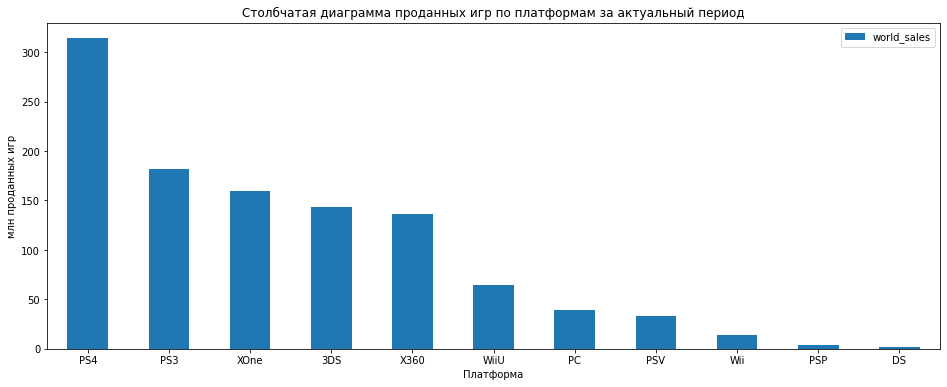

In [53]:
#Столбчатая диаграмма проданных игр по годам
(actual_games_data_pivot.plot(kind='bar', figsize=(16, 6), rot=0,
                              title='Столбчатая диаграмма проданных игр по платформам за актуальный период',
                             xlabel='Платформа', ylabel='млн проданных игр'))
plt.show()

In [54]:
#Сводная таблица по кол-ву продаж по платформам и по годам
(pd.pivot_table(actual_games_data, index=['platform', 'year_of_release'],
                                          values='world_sales', aggfunc='sum'))

world_sales
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2013                    1.54
PC       2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

In [55]:
#Подготовка данных для построения столбчатых диаграмм
actual_games_data_for_plots = actual_games_data[['platform' ,'year_of_release', 'world_sales']]

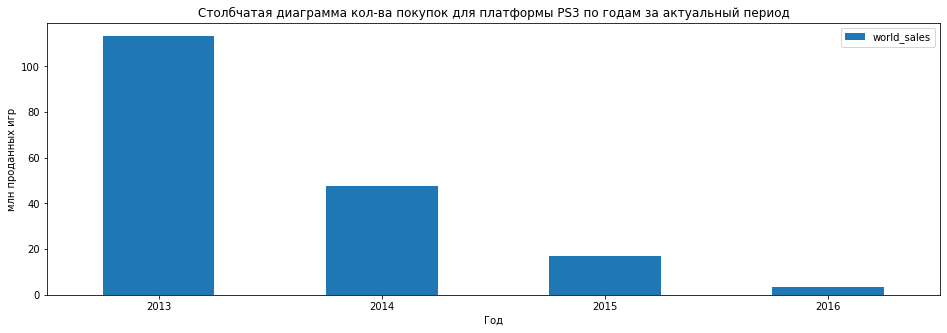

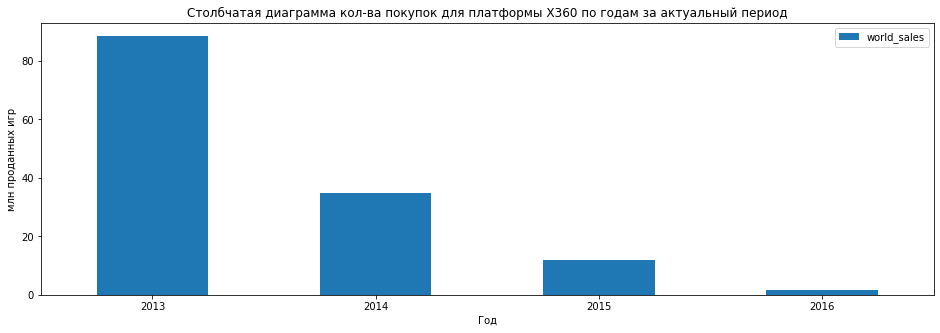

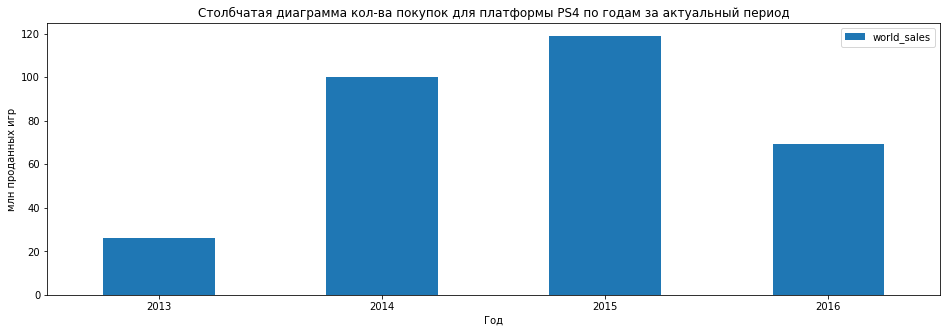

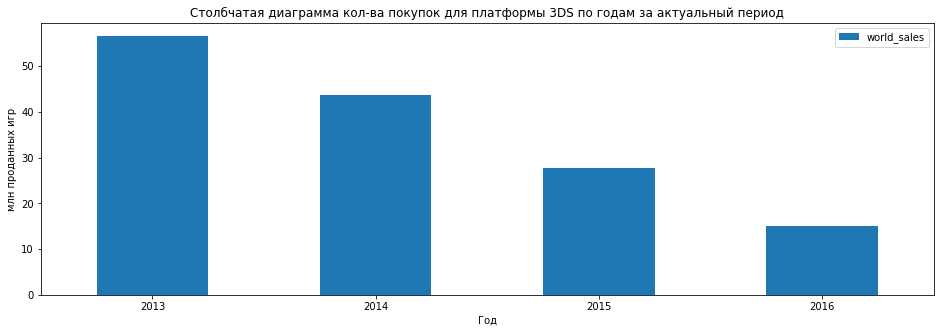

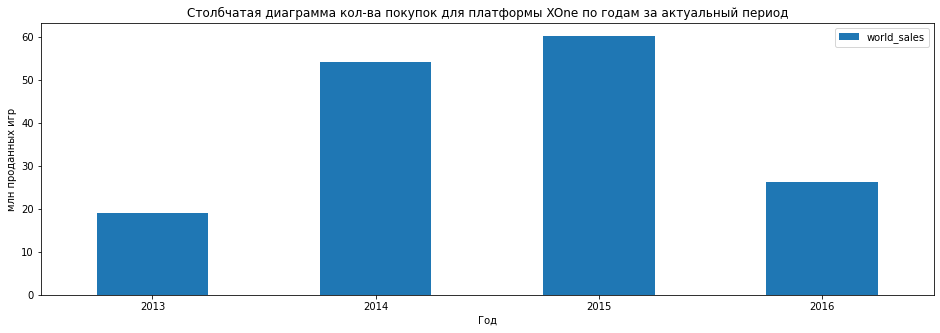

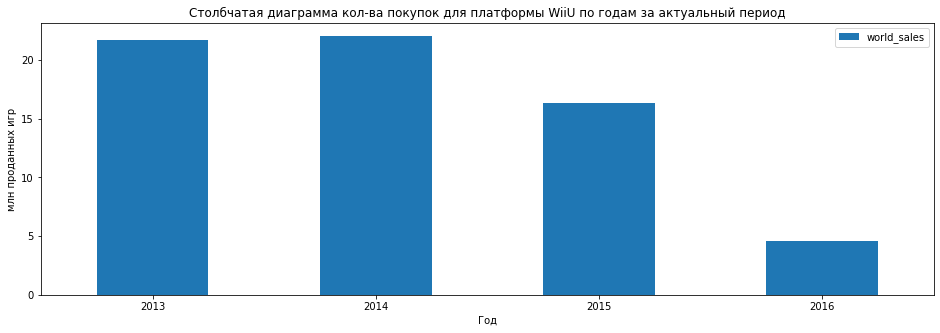

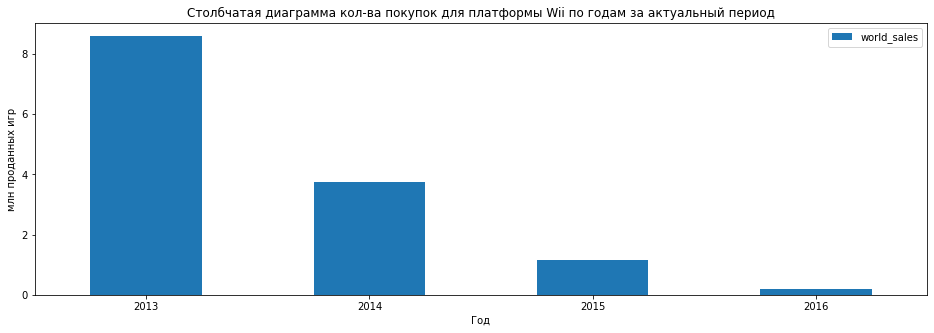

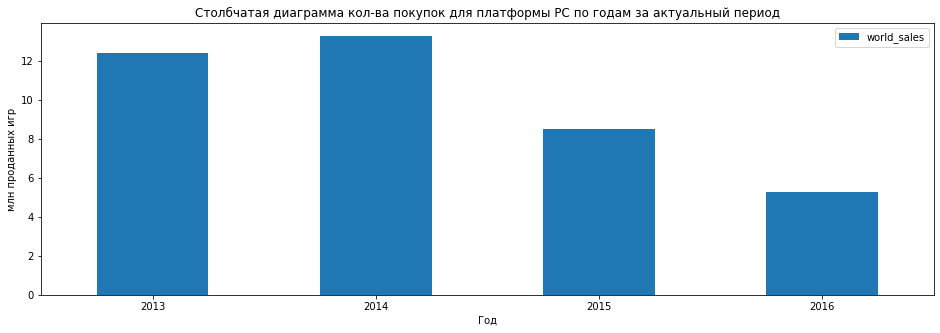

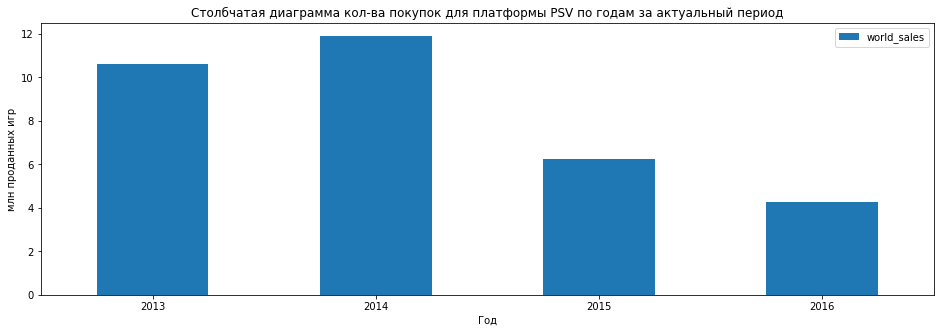

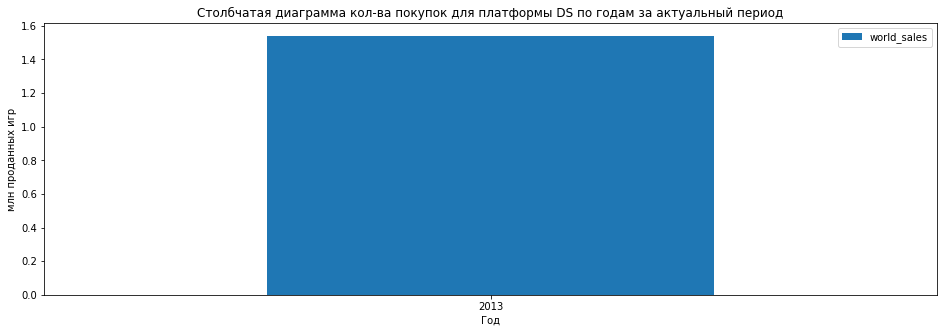

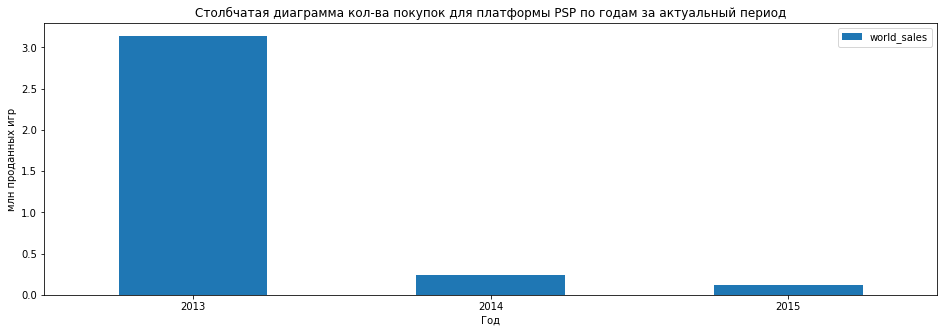

In [56]:
#Построение столбчатых диаграмм проданных игр по платформам за актуальный период
for platform in actual_games_data_for_plots['platform'].unique():
    (pd.pivot_table(actual_games_data_for_plots[actual_games_data_for_plots['platform'] == platform],
                    index='year_of_release', values='world_sales', aggfunc='sum')
     .plot(kind='bar', figsize=(16, 5), rot=0,
           title=f'Столбчатая диаграмма кол-ва покупок для платформы {platform} по годам за актуальный период',
          xlabel='Год', ylabel='млн проданных игр'))

По продажам лидируют (Топ-5): *PS4*, *PS3*, *XOne*, *3DS* и *X360*, суммарно на эти платформы было продано примерно 1 млрд копий игр.
Продажи ни на одну платформу не растут, а даже падают, как уже говорилось ранее это в том числе связано с общей тенденцией на рынке, однако можно выделить 2 группы:
- Первая - в эту группу входят платформы, на которые к 2016 году игры почти не продаются, а именно: *PS3*, *X360*, *Wii*, *DS* и  *PSP*. Все эти платформы являются платформами старого поколения.
- Вторая - в эту группу входят платформы, на которые к 2016 году игру прродаются в больших колличествах, а именно: *PS4*, *3DS*, *XOne*, *WiiU* и *PSV*. Все эти платформы являются платформами нового поколения. Именно эту группу мы отнесем к перспективным. Также *PC* отнесем к этой группе.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [57]:
#Описание данных для продаж по миру
actual_describe = actual_games_data['world_sales'].describe()
print('Описание данных для продаж по всему миру:')
display(actual_describe)

Описание данных для продаж по всему миру:


count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: world_sales, dtype: float64

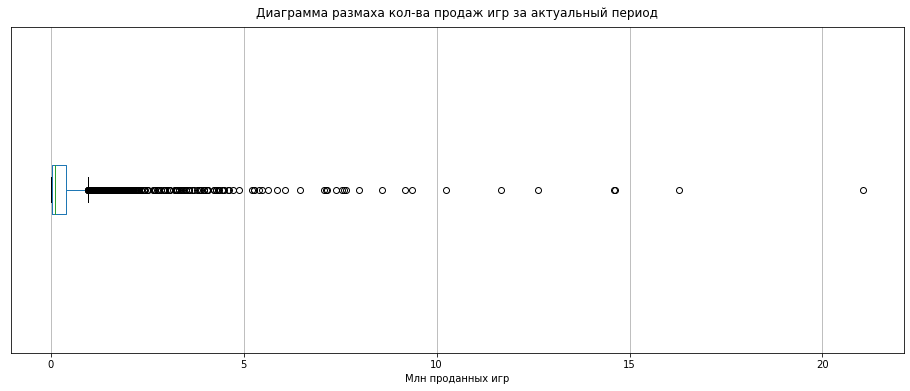

In [58]:
#Диаграмма размаха для продаж за актуальный периорд
actual_boxplot = actual_games_data.boxplot('world_sales', vert=False, figsize=(16, 6))
actual_boxplot.set_title('Диаграмма размаха кол-ва продаж игр за актуальный период', pad=10)
actual_boxplot.set_xlabel('Млн проданных игр')
actual_boxplot.yaxis.set_visible(False)

plt.show()

In [59]:
#Функция построения describe для какой-то платформы
def platform_desc(platform):
    return actual_games_data[actual_games_data['platform']==platform]['world_sales'].describe()

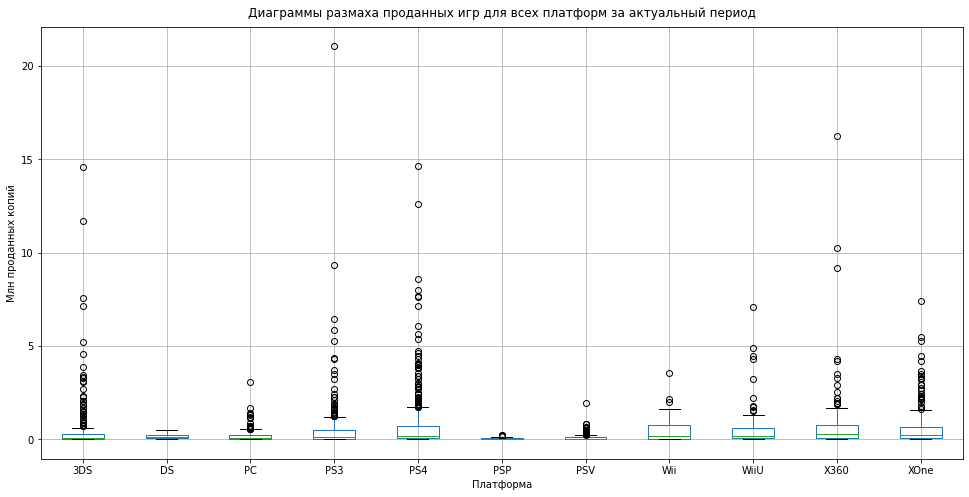

In [60]:
#Построение диаграмм размаха для всех платформ
platforms_boxplot = actual_games_data[['platform', 'world_sales']].boxplot('world_sales', by='platform', figsize=(16, 8))
platforms_boxplot.set_title('Диаграммы размаха проданных игр для всех платформ за актуальный период', pad=10)
platforms_boxplot.set_ylabel('Млн проданных копий')
platforms_boxplot.set_xlabel('Платформа')


figure = platforms_boxplot.get_figure()
figure.suptitle('')

plt.show()

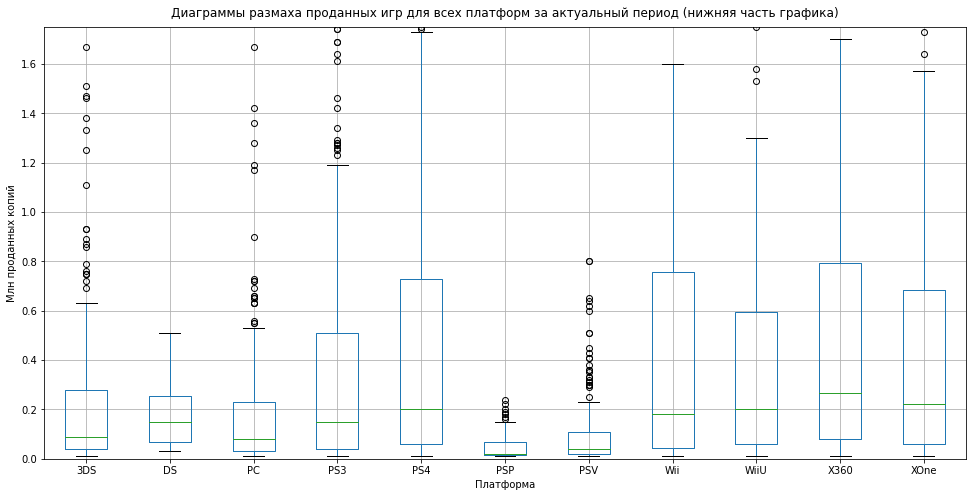

In [61]:
#Построение диаграмм размаха для всех платформ
platforms_boxplot_ylim = actual_games_data[['platform', 'world_sales']].boxplot('world_sales', by='platform', figsize=(16, 8))
platforms_boxplot_ylim.set_title('Диаграммы размаха проданных игр для всех платформ за актуальный период (нижняя часть графика)', pad=10)
platforms_boxplot_ylim.set_ylabel('Млн проданных копий')
platforms_boxplot_ylim.set_xlabel('Платформа')
platforms_boxplot_ylim.set_ylim(0, 1.75)

figure = platforms_boxplot_ylim.get_figure()
figure.suptitle('')

plt.show()

In [62]:
#Создание таблицы с describe для каждой платформы 
describes_list = []
platform_name_list = []
for platform in actual_games_data['platform'].unique():
    describes_list.append(platform_desc(platform))
    platform_name_list.append(f'{platform}_sales')

describes_df = pd.concat(describes_list, axis=1)
describes_df.columns = platform_name_list
describes_df = describes_df.transpose()
describes_df['count'] = describes_df['count'].astype('int')
describes_df

,count,mean,std,min,25%,50%,75%,max
PS3_sales,345,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
X360_sales,186,0.735484,1.663275,0.01,0.0800,0.265,0.7950,16.27
PS4_sales,392,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
3DS_sales,303,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
XOne_sales,247,0.645020,1.036139,0.01,0.0600,0.220,0.6850,7.39
WiiU_sales,115,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09
Wii_sales,23,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
PC_sales,189,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PSV_sales,358,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
DS_sales,8,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51


Каждая платформа отличается друг от друга по кол-ву продаж за актуальный период (2013-2016).

1. Среднее кол-во продаж по миру составляет 488 тыс. копий на одну игру, кол-во продаж обычно находится в диапазоне до 3 млн копий, 1ый квартитль - 30 тыс., медиана - 110 тыс., 3ий квартиль - 400 тыс, максимальное кол-во продаж - 21 млн.

2. Среднее кол-во продаж по PS4 составляет 800 тыс. копий на одну игру, 1ый квартитль - 60 тыс., медиана - 200 тыс., 3ий квартиль - 730 тыс, максимальное кол-во продаж - 14,5 млн.

3. Среднее кол-во продаж по PS3 составляет 525 тыс. копий на одну игру, 1ый квартитль - 40 тыс., медиана - 150 тыс., 3ий квартиль - 510 тыс, максимальное кол-во продаж - 21 млн.

4. Среднее кол-во продаж по 3DS составляет 470 тыс. копий на одну игру, 1ый квартитль - 40 тыс., медиана - 90 тыс., 3ий квартиль - 280 тыс, максимальное кол-во продаж - 14.6 млн.

5. Среднее кол-во продаж по XOne составляет 645 тыс. копий на одну игру, 1ый квартитль - 60 тыс., медиана - 220 тыс., 3ий квартиль - 685 тыс, максимальное кол-во продаж - 7.4 млн.

6. Среднее кол-во продаж по PSV составляет 92 тыс. копий на одну игру, 1ый квартитль - 20 тыс., медиана - 40 тыс., 3ий квартиль - 110 тыс, максимальное кол-во продаж - 2 млн.

7. Среднее кол-во продаж по PC составляет 210 тыс. копий на одну игру, 1ый квартитль - 30 тыс., медиана - 80 тыс., 3ий квартиль - 230 тыс, максимальное кол-во продаж - 3 млн.

8. Среднее кол-во продаж по X360 составляет 735 тыс. копий на одну игру, 1ый квартитль - 80 тыс., медиана - 265 тыс., 3ий квартиль - 795 тыс, максимальное кол-во продаж - 16.3 млн.

9. Среднее кол-во продаж по WiiU составляет 562 тыс. копий на одну игру, 1ый квартитль - 60 тыс., медиана - 200 тыс., 3ий квартиль - 595 тыс, максимальное кол-во продаж - 7 млн.

У PS4, PS3 и 3DS среднее значение больше, чем 3ий квартиль, это значит, что у этих платформ больше всего супер-успешных игр. Самые высокие медианы у X360 и XOne это значит, что игры на этих платформах чуть стабильнее, чем на остальных платформах в плане продаж, но при игры на этих платформах не так часто становятся супер-успешными.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Для анализа возьмем PS4 т.к. эта платформа является самой популярной за актуальный период, а также она является одной из самых современных.

In [63]:
#Подготовка данных для анализа
PS4_sales_scores = (actual_games_data[actual_games_data['platform']=='PS4'][['critic_score', 'user_score', 'world_sales']]
                    .reset_index(drop=True))
PS4_sales_scores

,critic_score,user_score,world_sales
0,<NA>,NaN,14.63
1,97,8.3,12.62
2,82,4.3,8.58
3,<NA>,NaN,7.98
4,83,5.7,7.66
...,...,...,...
387,69,7.5,0.01
388,<NA>,NaN,0.01
389,61,7.9,0.01
390,51,5.5,0.01


In [64]:
#Подсчет корреляции
PS4_sales_scores.corr()

,critic_score,user_score,world_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
world_sales,0.406568,-0.031957,1.000000


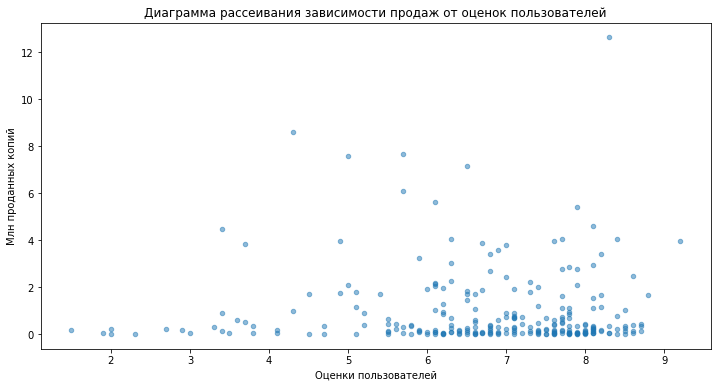

In [65]:
PS4_sales_scores.plot(x='user_score', y='world_sales', kind='scatter', figsize=(12, 6), alpha=0.5,
                      title='Диаграмма рассеивания зависимости продаж от оценок пользователей',
                     xlabel='Оценки пользователей', ylabel='Млн проданных копий')
plt.show()

Для платформы PS4 очень важно качество игр, оценки критиков имеют прямую корреляцию с оценками пользователей и продажми, это значит, что чем больше будет оценка критиков, тем скорее всего лучше будет оценка пользователей и больше продажи. Оценки пользователей имеют незначительную обратную корреляцию с продажами, нет почти никакой зависимости оценок пользователй и продаж за актуальный период.

### Соотнесите выводы с продажами игр на других платформах.

In [66]:
#Функция для построения матрицы диаграмм рассеивания для конкретной платформы
def desc_and_scat_matrix(platform):
    current_platform = actual_games_data[actual_games_data['platform'] == platform][['critic_score', 'user_score', 'world_sales']]
    current_platform.dropna(inplace=True)
    print(f'Таблица корреляций диаграммы рассеивания для {platform}:')
    display(current_platform.corr())
    
    fig, ax = plt.subplots(1, 2)
    fig.tight_layout(h_pad=1)
    fig.set_figheight(6)
    fig.set_figwidth(14)
    
    critic_scatter = ax[0]
    user_scatter = ax[1]
    
    critic_scatter.grid(True)
    user_scatter.grid(True)
    
    critic_scatter.set_title(f'Диаграмма рассеивания оценок критиков и продаж платформы {platform}', pad=20)
    user_scatter.set_title(f'Диаграмма рассеивания оценок пользователей и продаж платформы {platform}', pad=20)
    
    critic_scatter.set_xlabel('Оценка критиков')
    critic_scatter.set_ylabel('Млн проданных копий')
    user_scatter.set_xlabel('Оценка пользователей')
    user_scatter.set_ylabel('Млн проданных копий')
    
    
    critic_scatter.scatter(current_platform['critic_score'], current_platform['world_sales'], alpha=.5)
    user_scatter.scatter(current_platform['user_score'], current_platform['world_sales'], alpha=.5)
    
    plt.show()

Таблица корреляций диаграммы рассеивания для PS3:


,critic_score,user_score,world_sales
critic_score,1.000000,0.599920,0.333807
user_score,0.599920,1.000000,0.022691
world_sales,0.333807,0.022691,1.000000


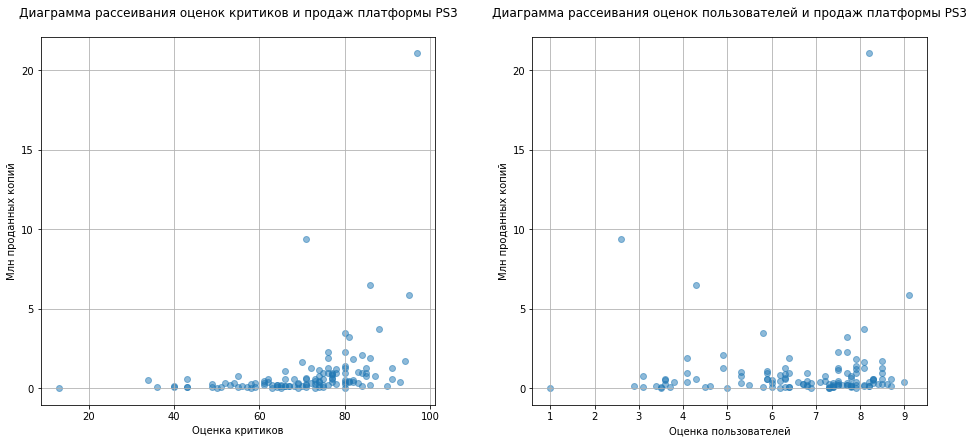

Таблица корреляций диаграммы рассеивания для X360:


,critic_score,user_score,world_sales
critic_score,1.000000,0.520946,0.350345
user_score,0.520946,1.000000,-0.006238
world_sales,0.350345,-0.006238,1.000000


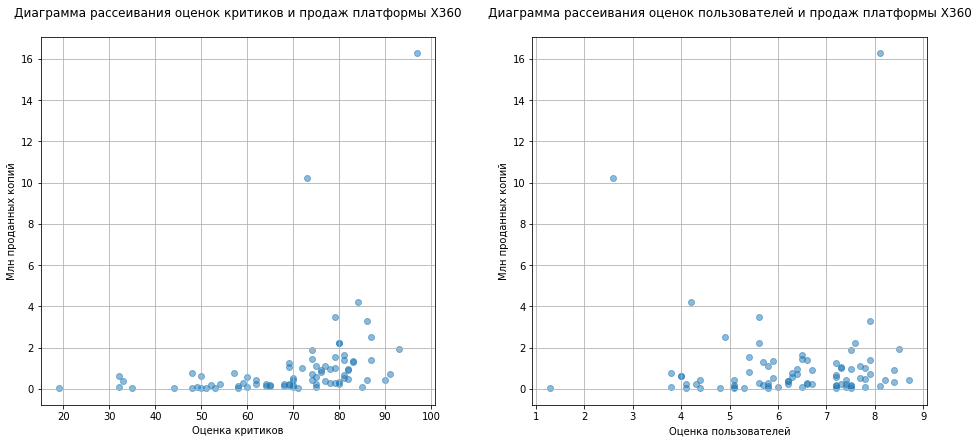

Таблица корреляций диаграммы рассеивания для 3DS:


,critic_score,user_score,world_sales
critic_score,1.000000,0.769536,0.339235
user_score,0.769536,1.000000,0.272990
world_sales,0.339235,0.272990,1.000000


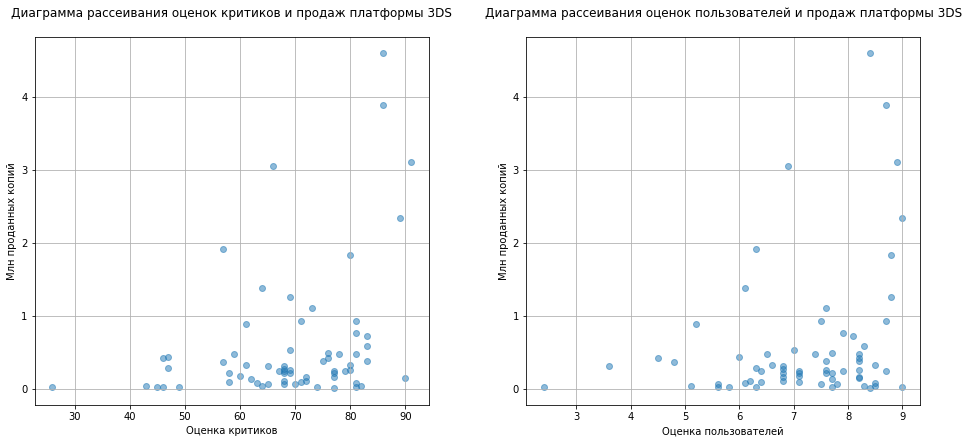

Таблица корреляций диаграммы рассеивания для XOne:


,critic_score,user_score,world_sales
critic_score,1.000000,0.472462,0.410422
user_score,0.472462,1.000000,-0.094003
world_sales,0.410422,-0.094003,1.000000


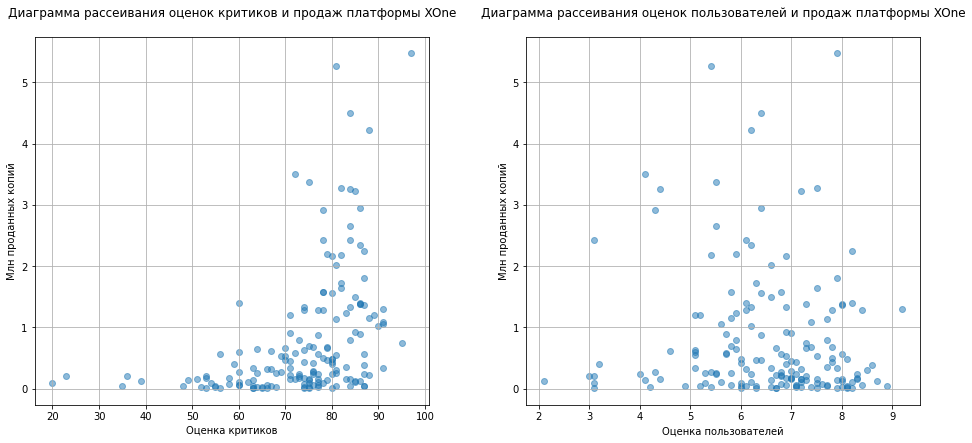

Таблица корреляций диаграммы рассеивания для WiiU:


,critic_score,user_score,world_sales
critic_score,1.000000,0.721313,0.379504
user_score,0.721313,1.000000,0.408692
world_sales,0.379504,0.408692,1.000000


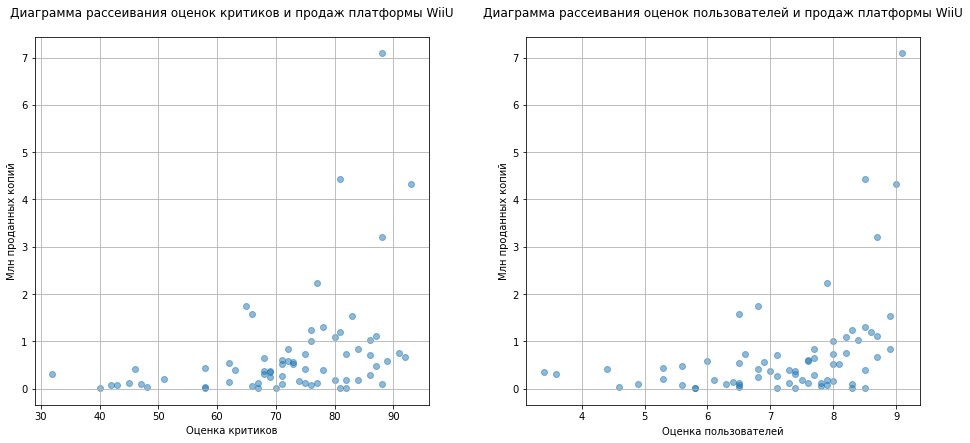

Таблица корреляций диаграммы рассеивания для PC:


,critic_score,user_score,world_sales
critic_score,1.000000,0.429562,0.194124
user_score,0.429562,1.000000,-0.109235
world_sales,0.194124,-0.109235,1.000000


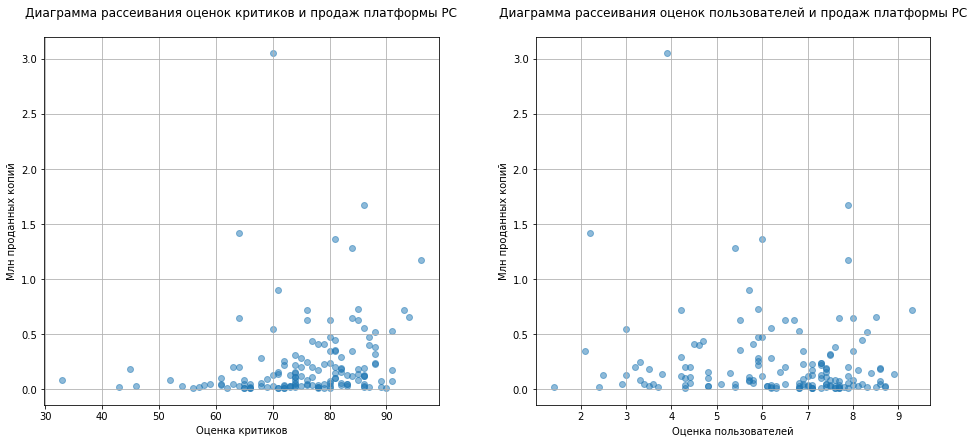

Таблица корреляций диаграммы рассеивания для PSV:


,critic_score,user_score,world_sales
critic_score,1.000000,0.611521,0.254100
user_score,0.611521,1.000000,0.265478
world_sales,0.254100,0.265478,1.000000


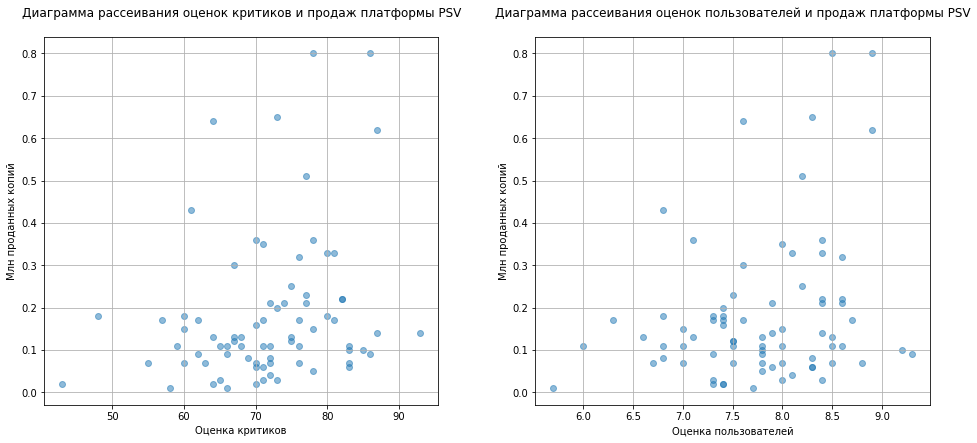

In [67]:
#Подсчет корреляций и построение матрицы диаграмм рассеивания для популярных платформ
platform_list = ['PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV']
for platform in platform_list:
    desc_and_scat_matrix(platform)

Ситуация на всех платформах примерно такая же как и у PS4, но выделяются 3DS и WiiU у которых существует, хотя и не такая сильная, прямая корреляция оценок пользователей и продаж.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [68]:
#Сводная таблица с кол-вом игр по жанрам за акутальный период
genre_pivot_count = (pd.pivot_table(actual_games_data, index='genre', values='world_sales', aggfunc='count')
                     .sort_values('world_sales', ascending=False))
genre_pivot_count.columns = ['Кол-во игр']
genre_pivot_count

,Кол-во игр
genre,
Action,766
Role-Playing,292
Adventure,245
Sports,214
Shooter,187
Misc,155
Racing,85
Fighting,80
Platform,74


In [69]:
#Сводная таблица с кол-вом продаж по жанрам за акутальный период
genre_pivot_sum = (pd.pivot_table(actual_games_data, index='genre', values='world_sales', aggfunc='sum')
                   .sort_values('world_sales', ascending=False))
genre_pivot_sum.columns = ['Кол-во продаж']
genre_pivot_sum

,Кол-во продаж
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


In [70]:
actual_games_data[['genre', 'world_sales']].groupby('genre').median().sort_values(by='world_sales', ascending=False)

,world_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


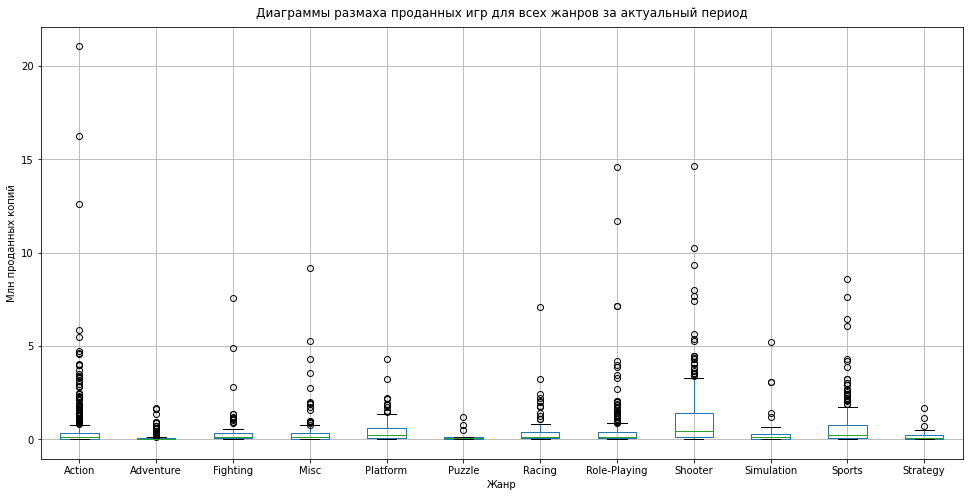

In [71]:
genres_boxplot = actual_games_data[['genre', 'world_sales']].boxplot('world_sales', by='genre', figsize=(16, 8))

genres_boxplot.set_title('Диаграммы размаха проданных игр для всех жанров за актуальный период', pad=10)
genres_boxplot.set_ylabel('Млн проданных копий')
genres_boxplot.set_xlabel('Жанр')

figure = genres_boxplot.get_figure()
figure.suptitle('')

plt.show()

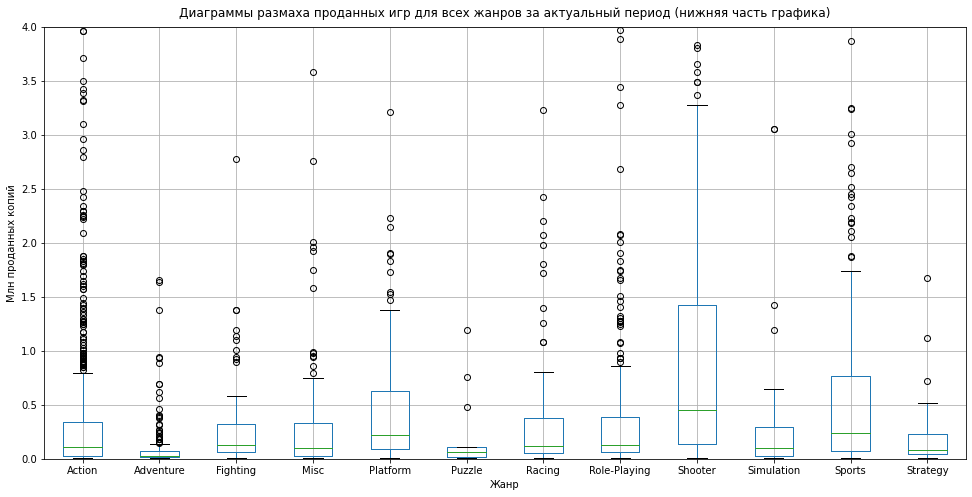

In [72]:
genres_boxplot_ylim = actual_games_data[['genre', 'world_sales']].boxplot('world_sales', by='genre', figsize=(16, 8))

genres_boxplot_ylim.set_title('Диаграммы размаха проданных игр для всех жанров за актуальный период (нижняя часть графика)', pad=10)
genres_boxplot_ylim.set_ylabel('Млн проданных копий')
genres_boxplot_ylim.set_xlabel('Жанр')
genres_boxplot_ylim.set_ylim(0, 4)

figure = genres_boxplot_ylim.get_figure()
figure.suptitle('')

plt.show()

Выводы по жанрам игр:
1. Самым популярными жанром является Action, дальше с заметным отставанием Role_Playing, Adventure, Sports, Shooter и Misc.
2. Самым не популярным жанром является Puzzle.
3. Самое большое кол-во проданных копий у жанров Action, Shooter, Sports и Role_Playing.
4. Самое маленькое кол-во проданных копий у жанра Puzzle.
5. Жанр Action имеет самое большое кол-во сверхуспешных игр с проданными копиями больше 1ого миллиона.
6. Самым стабильным жанром с точки зрения продаж является жанр Shooter. Это показывают несколько факторов: Во-первых у жанра Shooter самая высокая медиана. Во-вторых, на диаграмме размаха видно какую большую область занимает сам ящик с усами этого жанра, внутри ящика c усами находится подавляющее кол-во игр этого жанра, а значит игр до 3 млн продаж значительно больше чем в других жанрах.

**Вывод после исследовательского анализа данных**

1. Данные за весь период не важны, т.к. с 1980 до 1993 выпускалось очень мало игр и в целом эта индустрия только зараждалась. После 1993 года кол-во выпущенных игр стабильно росло и к 2002 году эта индустрия набрала полный ход, в связи с развитием технологий и появлением новых, своременных игровых движков. К 2008 и 2009 годам индустрия дошла до своего пика и после пошла на спад связанный с финансовым кризисом и общим удорожанием производства.
2. Для популярных платформ медианный срок жизни составляет 7 лет, пик продаж обычно происходит примерно на 4ый год. Избавились о  одной аномальной строчки.
3. Взяли актуальный период с 2013 года, потому что он соответсвует первому году продаж игр на PS4, логично предположить, что продажи на данную платформу будут только расти, плюс пик продаж обычно как раз приходится примерно на 5ый год т.е. 2017 год. Спад в 2016 году у PS4 скорее связан с общей ситуацией на рынке, есть общая тенденция снижения кол-ва продаж т.к. крупные компании предпочитают делать игры годами, ставя в приоритет качество, а не кол-во.
4. Срез по актуальным даннным сделали в предыдущем пункте, дальше будем работать именно с этим срезом.
5. По продажам лидируют (Топ-5): PS4, PS3, XOne, 3DS и X360, суммарно на эти платформы было продано примерно 1 млрд копий игр. Продажи ни на одну платформу не растут, а даже падают, как уже говорилось ранее это в том числе связано с общей тенденцией на рынке, однако можно выделить 2 группы:
 
 - Первая - в эту группу входят платформы, на которые к 2016 году игры почти не продаются, а именно: PS3, X360, Wii, DS и PSP. Все эти платформы являются платформами старого поколения.
 - Вторая - в эту группу входят платформы, на которые к 2016 году игру прродаются в больших колличествах, а именно: PS4, 3DS, XOne, WiiU и PSV. Все эти платформы являются платформами нового поколения. Именно эту группу мы отнесем к перспективным. Также PC отнесем к этой группе.
6. Каждая платформа отличается друг от друга по кол-ву продаж за актуальный период (2013-2016).
 
 - У PS4, PS3 и 3DS среднее значение больше, чем 3ий квартиль, это значит, что у этих платформ больше всего супер-успешных игр. Самые высокие медианы у X360 и XOne это значит, что игры на этих платформах чуть стабильнее, чем на остальных платформах в плане продаж, но при игры на этих платформах не так часто становятся супер-успешными.
7. Для платформы PS4 очень важно качество игр, оценки критиков имеют прямую корреляцию с оценками пользователей и продажми, это значит, что чем больше будет оценка критиков, тем скорее всего лучше будет оценка пользователей и больше продажи. Оценки пользователей имеют незначительную обратную корреляцию с продажами, нет почти никакой зависимости оценок пользователй и продаж за актуальный период.
8. Ситуация на всех платформах примерно такая же как и у PS4, но выделяются 3DS и WiiU у которых существует, хотя и не такая сильная, прямая корреляция оценок пользователей и продаж.
9. Посмотрели на распределение игр по жанрам и выяснили, что:
 - Самым популярными жанром является Action, дальше с заметным отставанием Role_Playing, Adventure, Sports, Shooter и Misc.
 - Самым не популярным жанром является Puzzle.
 -  Самое большое кол-во проданных копий у жанров Action, Shooter, Sports и Role_Playing.
 - Самое маленькое кол-во проданных копий у жанра Puzzle.
 - Жанр Action имеет самое большое кол-во сверхуспешных игр с проданными копиями больше 1ого миллиона.
 - Самым стабильным жанром с точки зрения продаж является жанр Shooter. Это показывают несколько факторов: Во-первых у жанра Shooter самая высокая медиана. Во-вторых, на диаграмме размаха видно какую большую область занимает сам ящик с усами этого жанра, внутри ящика c усами находится подавляющее кол-во игр этого жанра, а значит игр до 3 млн продаж значительно больше чем в других жанрах.

## Портреты пользователей каждого региона
<a id='section_4'></a>

In [73]:
#Функция построения сводной таблицы
def user_portreit_pivot(index, values, column_name):
    region_dict={'eu': 'Европы', 'jp': 'Японии', 'na': 'Северной Америки'}
    piv = pd.pivot_table(actual_games_data[actual_games_data[values] > 0], index=index, values=values,
                                        aggfunc='sum').sort_values(values, ascending=False).head()
    region = region_dict[piv.columns[0].split('_')[0]]
    piv.columns = [column_name]
    return piv, region

In [74]:
#Функция построения "портрета" пользователя
def user_portrait(columns, region, column_name):
    portrait_list = []
    region_list = []
    values = region + '_sales'
    for column in columns:
        portrait, region = user_portreit_pivot(column, values, column_name)
        portrait_list.append(portrait)
        region_list.append(region)
    return portrait_list, region

In [75]:
#Функция визуализации "портрета" пользователя
def user_portrait_print(portrait_region):
    portrait_list, region = portrait_region
    print(f'Портрет пользователя из {region}:\n')
    for port in portrait_list:
        print(f'Распределение по {port.index.name}:')
        display(port)
        print()

In [76]:
#Построение "портрета" пользователя для Северной Америки
user_portrait_print(user_portrait(columns = ['platform', 'genre', 'rating'], region = 'na', column_name = 'Миллионов продаж'))

Портрет пользователя из Северной Америки:

Распределение по platform:


,Миллионов продаж
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20



Распределение по genre:


,Миллионов продаж
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49



Распределение по rating:


,Миллионов продаж
rating,
M,165.21
PL,89.42
E,79.05
E10+,54.24
T,49.79


Северная Америка:
- Топ-5 платформ: PS4, XOne, X360, PS3, 3DS.
- Топ-5 жанров игр: Action, Shooter, Sports, Role-Playing, Misc.
- Рейтинг ESRB влияет на продажи, самый популярный рейтинг - M (17+).

In [77]:
#Построение "портрета" пользователя для Еврорпы
user_portrait_print(user_portrait(columns = ['platform', 'genre', 'rating'], region = 'eu', column_name = 'Миллионов продаж'))

Портрет пользователя из Европы:

Распределение по platform:


,Миллионов продаж
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96



Распределение по genre:


,Миллионов продаж
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19



Распределение по rating:


,Миллионов продаж
rating,
M,145.32
E,83.36
PL,78.91
E10+,42.69
T,41.95


Европа:
- Топ-5 платформ: PS4, PS3, XOne, X360, 3DS.
- Топ-5 жанров игр: Action, Shooter, Sports, Role-Playing, Racing.
- Рейтинг ESRB влияет на продажи, самый популярный рейтинг - M (17+).

In [78]:
#Построение "портрета" пользователя для Японии
user_portrait_print(user_portrait(columns = ['platform', 'genre', 'rating'], region = 'jp', column_name = 'Миллионов продаж'))

Портрет пользователя из Японии:

Распределение по platform:


,Миллионов продаж
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88



Распределение по genre:


,Миллионов продаж
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61



Распределение по rating:


,Миллионов продаж
rating,
PL,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


Япония:
- Топ-5 платформ: 3DS, PS3, PSV, PS4, WiiU.
- Топ-5 жанров игр: Role-Playing, Action, Misc, Fighting, Shooter.
- Рейтинг ESRB влияет на продажи. Чаще всего в Японии, люди грают в игры без рейтинга ESRB.

In [79]:
def create_pivot_top(data, index, values, num_top):
    pivot = pd.pivot_table(data, index=index, values=values, aggfunc='sum').sort_values(values, ascending=False)
    
    top_data = pivot.head()
    
    if len(pivot) > num_top:
        other_data = pivot.tail(len(pivot) - num_top)
        other_sum = other_data[values].sum()
        other = pd.DataFrame({index: ['Other'], values: [other_sum]})
        other = pd.pivot_table(other, index=index, values=values, aggfunc='sum')

        res_data=pd.concat([top_data, other]).sort_values(values, ascending=False)
    
    else: res_data = top_data
    
    return res_data

In [80]:
def create_plots_for_regions(data, index, values, num_top, suptitle):
    pivot_list = []
    for value in values:
        pivot_list.append(create_pivot_top(data, index, value, num_top))
        
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    plt.suptitle(suptitle)
    
    region_dict = {'na': 'Северная Америка', 'eu': 'Европа', 'jp': 'Япония'}
    
    i = 0
    for pivot in pivot_list:
        pivot.plot(y=pivot.columns[0], kind='pie', ax=axs[i], autopct='%1.1f%%',
                   title=region_dict[pivot.columns[0].split('_')[0]], legend=False, ylabel='')
        i+=1
        
    plt.show()

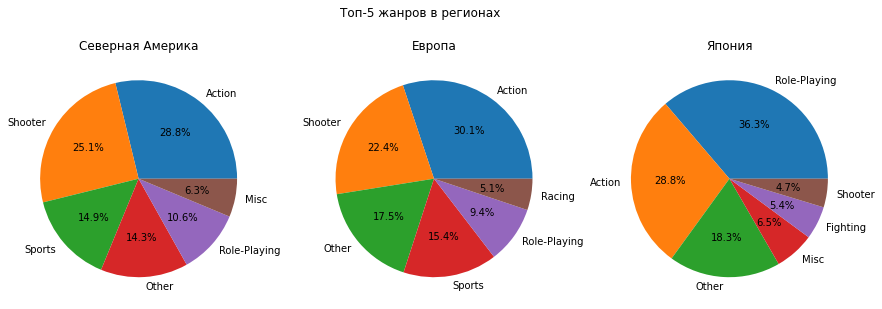

In [81]:
create_plots_for_regions(actual_games_data, 'genre', ['na_sales', 'eu_sales', 'jp_sales'], 5, 'Топ-5 жанров в регионах')

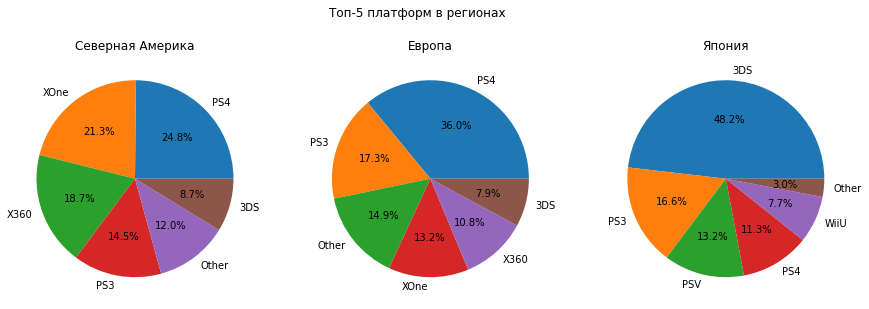

In [82]:
create_plots_for_regions(actual_games_data, 'platform', ['na_sales', 'eu_sales', 'jp_sales'], 5, 'Топ-5 платформ в регионах')

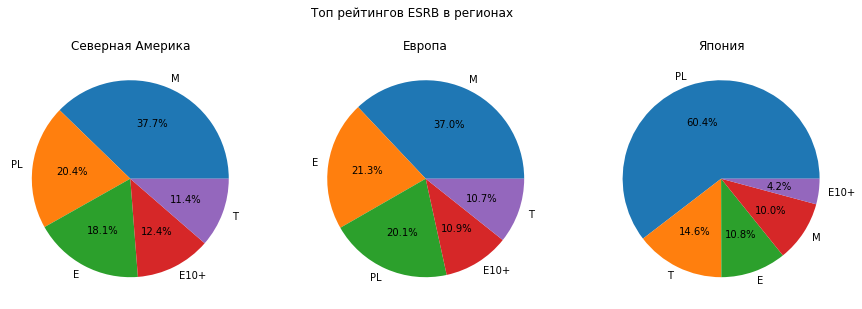

In [83]:
create_plots_for_regions(actual_games_data, 'rating', ['na_sales', 'eu_sales', 'jp_sales'], 5, 'Топ рейтингов ESRB в регионах')

**Вывод после составления портретов пользователей каждого региона**

Рейтинг платформ в каждом регионе (топ-5):
1. Северная Америка: PS4, XOne, X360, PS3, 3DS.
2. Европа: PS4, PS3, XOne, X360, 3DS.
3. Япония: 3DS, PS3, PSV, PS4, WiiU.

В Америке и Европе схожие тенденции по выбору платформ, Япония резко выделяется, пользователи там чаще используют портативные приставки типа 3DS и PSV. Так же влияет местоположение компаний, так Японская компания Nintendo широко представлена именно в Японии со своими платформами 3DS и WiiU, в Северной Америке компания Microsoft со своими XOne и X360, в Европе таких крупных компаний нет. Компания Sony со своими PS4, PS3 и PSV (особенно первые две платформы) широко представлена во всем мире, это показывает величину влияния этой компании на весь рынок.

Рейтинг жанров в каждом регионе (топ-5):
1. Северная Америка: Action, Shooter, Sports, Role-Playing, Misc.
2. Европа: Action, Shooter, Sports, Role-Playing, Racing.
3. Япония: Role-Playing, Action, Misc, Fighting, Shooter.

Самыми популярными жанрами в мире являются Action и Shooter. В Америке и Европе схожие тенденции в жанрах игр (Action, Shooter, Sports, Role_Playing), Япония сильно выделяется на их фоне с уклонов в ролевые игры (Role_PLaying).

Возрастной рейтинг влияет во всех регионах, в Северной Америке и Европе - M (17+), а в Японии чаще всего играют в игры без рейтига ESRB. Это связано с местоположением компании ESRB, которая базируется в США и Канаде. На Японском рынке много игр от японских разработчиков, а такие игры редко получают рейтинг ESRB.

Портреты пользователей регионов:

1. Пользователь из Северной Америки: 17+ лет, любит играть в экшн и шутеры на стационарных приставках PS4, XOne, X360.
2. Пользователь из Европы: 17+ лет, любит играть в экшн и шутеры на стацонарной приставке PS4.
3. Пользователь из Японии: возраст не известец, любит играть в ролевые и экшн игры на портативной приставке 3DS.

## Проверка гипотез
<a id='section_5'></a>

In [84]:
#Функция визуализации результата проверки гипотезы
def hypothesis_test_res(results, alpha):
    print('p-значение:', results.pvalue)

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Подготовим данные для проверки гипотезы:

In [85]:
#Срез данных для анализа платформы XOne
actual_xone = actual_games_data[actual_games_data['platform'] == 'XOne']['user_score'].dropna().reset_index(drop=True)
actual_xone

0      7.9
1      5.4
2      6.4
3      6.2
4      4.1
      ... 
177    6.8
178    6.0
179    8.2
180    6.6
181    6.7
Name: user_score, Length: 182, dtype: float64

In [86]:
#Срез данных для анализа платформы PC
actual_pc = actual_games_data[actual_games_data['platform'] == 'PC']['user_score'].dropna().reset_index(drop=True)
actual_pc

0      3.9
1      7.9
2      2.2
3      6.0
4      5.4
      ... 
150    8.3
151    6.8
152    7.9
153    1.4
154    7.6
Name: user_score, Length: 155, dtype: float64

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативаная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные.

Если нулевая гипотеза подтвердится, это будет значить, что вероятность ее правдивости высока, соответсвенно очень высока вероятность того, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Если же нулевая гипотеза будет отвергнута, это будет значить, что скорее всего средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Статистическую значимость примем равной 0.01 (1%). Использовать будем тест стьюдента, а именно метод st.ttest_ind, который предназначен для проверки гипотез о равенстве средних двух генеральных совокупностей по взятым из них выборкам.

In [87]:
#Проверка гипотезы
alpha = .01

results = st.ttest_ind(actual_xone, actual_pc)

hypothesis_test_res(results, alpha)

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


In [88]:
print('Медиана пользовательских рейтингов платформы XOne:', actual_xone.median())
print('Медиана пользовательских рейтингов платформы PC:', actual_pc.median())

Медиана пользовательских рейтингов платформы XOne: 6.8
Медиана пользовательских рейтингов платформы PC: 6.8


Результат говорит, что очень вероятно что средние пользовательские рейтинги платформ Xbox One и PC одинаковы, что и показывают медианы пользовательских рейтингов этих платформ.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Подготовим для проверки гипотезы:

In [89]:
#Срез данных для анализа жанров Action
actual_action = actual_games_data[actual_games_data['genre'] == 'Action']['user_score'].dropna().reset_index(drop=True)
actual_action

0      8.2
1      8.1
2      8.3
3      9.1
4      7.9
      ... 
384    6.0
385    8.5
386    5.1
387    6.7
388    7.6
Name: user_score, Length: 389, dtype: float64

In [90]:
#Срез данных для анализа жанров Sports
actual_sports = actual_games_data[actual_games_data['genre'] == 'Sports']['user_score'].dropna().reset_index(drop=True)
actual_sports

0      4.3
1      5.0
2      4.3
3      5.7
4      4.5
      ... 
155    8.8
156    6.9
157    4.5
158    1.4
159    6.6
Name: user_score, Length: 160, dtype: float64

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативаная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

Если нулевая гипотеза подтвердится, это будет значить, что вероятность ее правдивости высока, соответсвенно очень высока вероятность того, что средние пользовательские рейтинги жанров Action и Sports одинаковые. Если же нулевая гипотеза будет отвергнута, это будет значить, что скорее всего средние пользовательские рейтинги жанров Action и Sports отличаются.

Статистическую значимость примем равной 0.01 (1%). Использовать будем тест стьюдента, а именно метод st.ttest_ind, который предназначен для проверки гипотез о равенстве средних двух генеральных совокупностей по взятым из них выборкам.

In [91]:
#Проверка гипотезы
alpha = .01

results = st.ttest_ind(actual_action, actual_sports)

hypothesis_test_res(results, alpha)

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


In [93]:
print('Медиана пользовательских рейтингов жанра Action:', actual_action.median())
print('Медиана пользовательских рейтингов жанра Sports:', actual_sports.median())

Медиана пользовательских рейтингов жанра Action: 7.1
Медиана пользовательских рейтингов жанра Sports: 5.5


Результат означает, что скорее всего средние пользовательские рейтинги жанров Action и Sports разные, а это и есть наша изначальная гипотеза, что и подтверждают медианы пользовательских рейтингов этих жанров.

**Вывод после проверки гипотез**

1. После проверки первой гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.", увеличили свою уверенность в данной гипотезе.
2. После проверки второй гипотезы "Средние пользовательские рейтинги жанров Action и Sports разные.", увеличили свою уверенность в данной гипотезе.

## Общий вывод
<a id='section_6'></a>

В процессе исследования данных интернет-магазина "Стримчик" было сделано следующее:

### Загрузка данных

Загрузили датафрейм **games**, в нем 11 столбцов, 16715 записей.

Типы данных:
1. Категориальные: Name, Platform, Genre, Rating.
2. Колличественные: Year_of_Release, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score.

Есть пропуски в столбцах:
- Name
- Year_of_Release
- Genre
- Critic_Score
- User_Score 
- Rating

Все столбцы нужно привести к *snake_case* (Убрать заглавные буквы в начале названий).

Изменения типа данных требуют столбцы:
- Year_of_Release на *int* (год издания - целое число )
- Critic_Score на *int* (Оценки критиков в датафрейме - целые числа)
- User_Score на *float* (Оценки пользователей в датафреме - вещественные числа)

### Предобработка данных

**1. Обработка пропусков**

1. Удалили 2 строки с пропусками в name и genre одновременно.
2. Заполнили все пропуски в rating заглушкой со значением PL.
3. Были заполены некоторые пропуски в year_of_release на основе стобца name, остальные пропуски удалены.
4. Значение "tbd" в user_score заменили на nan (пустое значение) т.к. , "to be defined" ("tbd") означает, что значения пока что нет.

**2. Обработка дубликатов**

1. Был найден 1 дубликат, учтен в датафрейме и потом удален.

**3. Изменения типов данных**

1. Тип year_of_release изменен на *int*.
2. Тип critic_score изменен на *int*.
3. Тип user_score изменен на *float*.

**4. Добавление нового столбца**

1. Был добавлен столбец world_sales с суммарными продажами по миру.

**5. Причины возникновения пропусков**

1. Пропуски в name и genre связаны с тем, что издатель или какое-то другое ответсвенное лицо не указали эти данные, либо даже эта информация просто где-то потерялась. Также все эти пропуски относятся к одной и той же игре выпущенной в 1993 году, тогда особо не было баз данных с компьютерными играми, не удивительно, что у этой игры так много пропусков

2. Пропуски в year_of_release скорее всего связаны с тем, что издатель или какое-то другое ответсвенное лицо не указали эти данные, также имеют место ошибки и просто потерянные данные.

3. Пропуски в rating связаны с тем, что чтобы присвоить игре rating игру должна рассмотреть целая организация ESRB, это занимает время, а также далеко не все игры вообще получают этот rating за все время своего сущестования, как правило это только самые дорогие в разработке и популярные игры, плюс компания разработчик находится США либо Европе, где и базируется компания ESRB. 

4. Пропуски в user_score и critic_score связаны примерно с теми же причинами, что и rating, чтобы получить оценки от пользователй и критиков игра должна быть достаточно для этого известной, а этим качеством обладают далеко не все игры, также должно пройти достаточно времени для формирования оценок.

### Исследовательский анализ

1. Данные за весь период не важны, т.к. с 1980 до 1993 выпускалось очень мало игр и в целом эта индустрия только зараждалась. После 1993 года кол-во выпущенных игр стабильно росло и к 2002 году эта индустрия набрала полный ход, в связи с развитием технологий и появлением новых, своременных игровых движков. К 2008 и 2009 годам индустрия дошла до своего пика и после пошла на спад связанный с финансовым кризисом и общим удорожанием производства.
2. Для популярных платформ медианный срок жизни составляет 7 лет, пик продаж обычно происходит примерно на 4ый год. Избавились о  одной аномальной строчки.
3. Взяли актуальный период с 2013 года, потому что он соответсвует первому году продаж игр на PS4, логично предположить, что продажи на данную платформу будут только расти, плюс пик продаж обычно как раз приходится примерно на 5ый год т.е. 2017 год. Спад в 2016 году у PS4 скорее связан с общей ситуацией на рынке, есть общая тенденция снижения кол-ва продаж т.к. крупные компании предпочитают делать игры годами, ставя в приоритет качество, а не кол-во.
4. Срез по актуальным даннным сделали в предыдущем пункте, дальше будем работать именно с этим срезом.
5. По продажам лидируют (Топ-5): PS4, PS3, XOne, 3DS и X360, суммарно на эти платформы было продано примерно 1 млрд копий игр. Продажи ни на одну платформу не растут, а даже падают, как уже говорилось ранее это в том числе связано с общей тенденцией на рынке, однако можно выделить 2 группы:
 
 - Первая - в эту группу входят платформы, на которые к 2016 году игры почти не продаются, а именно: PS3, X360, Wii, DS и PSP. Все эти платформы являются платформами старого поколения.
 - Вторая - в эту группу входят платформы, на которые к 2016 году игру прродаются в больших колличествах, а именно: PS4, 3DS, XOne, WiiU и PSV. Все эти платформы являются платформами нового поколения. Именно эту группу мы отнесем к перспективным. Также PC отнесем к этой группе.
6. Каждая платформа отличается друг от друга по кол-ву продаж за актуальный период (2013-2016).
 
 - У PS4, PS3 и 3DS среднее значение больше, чем 3ий квартиль, это значит, что у этих платформ больше всего супер-успешных игр. Самые высокие медианы у X360 и XOne это значит, что игры на этих платформах чуть стабильнее, чем на остальных платформах в плане продаж, но при игры на этих платформах не так часто становятся супер-успешными.
7. Для платформы PS4 очень важно качество игр, оценки критиков имеют прямую корреляцию с оценками пользователей и продажми, это значит, что чем больше будет оценка критиков, тем скорее всего лучше будет оценка пользователей и больше продажи. Оценки пользователей имеют незначительную обратную корреляцию с продажами, нет почти никакой зависимости оценок пользователй и продаж за актуальный период.
8. Ситуация на всех платформах примерно такая же как и у PS4, но выделяются 3DS и WiiU у которых существует, хотя и не такая сильная, прямая корреляция оценок пользователей и продаж.
9. Посмотрели на распределение игр по жанрам и выяснили, что:
 - Самым популярными жанром является Action, дальше с заметным отставанием Role_Playing, Adventure, Sports, Shooter и Misc.
 - Самым не популярным жанром является Puzzle.
 -  Самое большое кол-во проданных копий у жанров Action, Shooter, Sports и Role_Playing.
 - Самое маленькое кол-во проданных копий у жанра Puzzle.
 - Жанр Action имеет самое большое кол-во сверхуспешных игр с проданными копиями больше 1ого миллиона.
 - Самым стабильным жанром с точки зрения продаж является жанр Shooter. Это показывают несколько факторов: Во-первых у жанра Shooter самая высокая медиана. Во-вторых, на диаграмме размаха видно какую большую область занимает сам ящик с усами этого жанра, внутри ящика c усами находится подавляющее кол-во игр этого жанра, а значит игр до 3 млн продаж значительно больше чем в других жанрах.

### Портреты пользователей каждого региона

Рейтинг платформ в каждом регионе (топ-5):
1. Северная Америка: PS4, XOne, X360, PS3, 3DS.
2. Европа: PS4, PS3, XOne, X360, 3DS.
3. Япония: 3DS, PS3, PSV, PS4, WiiU.

В Америке и Европе схожие тенденции по выбору платформ, Япония резко выделяется, пользователи там чаще используют портативные приставки типа 3DS и PSV. Так же влияет местоположение компаний, так Японская компания Nintendo широко представлена именно в Японии со своими платформами 3DS и WiiU, в Северной Америке компания Microsoft со своими XOne и X360, в Европе таких крупных компаний нет. Компания Sony со своими PS4, PS3 и PSV (особенно первые две платформы) широко представлена во всем мире, это показывает величину влияния этой компании на весь рынок.

Рейтинг жанров в каждом регионе (топ-5):
1. Северная Америка: Action, Shooter, Sports, Role-Playing, Misc.
2. Европа: Action, Shooter, Sports, Role-Playing, Racing.
3. Япония: Role-Playing, Action, Misc, Fighting, Shooter.

Самыми популярными жанрами в мире являются Action и Shooter. В Америке и Европе схожие тенденции в жанрах игр (Action, Shooter, Sports, Role_Playing), Япония сильно выделяется на их фоне с уклонов в ролевые игры (Role_PLaying).

Возрастной рейтинг влияет во всех регионах, в Северной Америке и Европе - M (17+), а в Японии чаще всего играют в игры без рейтига ESRB. Это связано с местоположением компании ESRB, которая базируется в США и Канаде. На Японском рынке много игр от японских разработчиков, а такие игры редко получают рейтинг ESRB.

Портреты пользователей регионов:

1. Пользователь из Северной Америки: 17+ лет, любит играть в экшн и шутеры на стационарных приставках PS4, XOne, X360.
2. Пользователь из Европы: 17+ лет, любит играть в экшн и шутеры на стацонарной приставке PS4.
3. Пользователь из Японии: возраст не известец, любит играть в ролевые и экшн игры на портативной приставке 3DS.

### Проверка гипотез

1. После проверки первой гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.", увеличили свою уверенность в данной гипотезе.
2. После проверки второй гипотезы "Средние пользовательские рейтинги жанров Action и Sports разные.", увеличили свою уверенность в данной гипотезе.

### Резюме

- Рекламную компанию на европейском и американском рынках стоит сконцентрировать на платформы PS4 и XOne на игры в жанре Shooter с возрастным рейтингом M (17+).
- Рекламсную компанию на японском рынке стоит сконцентрирорвать на портативных приставках DS3 на игры в жанре Role_Playing, о возрасnном рейтинге сказать трудно, потому что далеко не все игры в японии его получают.